In [4]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import imdb
from google.colab import drive

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from textblob import TextBlob

from sklearn.metrics import accuracy_score
import pickle

Using TensorFlow backend.


In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import gensim

# Load Google's pre-trained Word2Vec model.
word2vec = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/My Drive/Text Analytics/GoogleNews-vectors-negative300.bin', binary=True)

In [68]:
vocab = word2vec.vocab.keys()
wordsInVocab = len(vocab)
print (wordsInVocab)
print (word2vec.similarity('this', 'is'))
print (word2vec.similarity('post', 'book'))

3000000
0.40797037
0.057204384


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
word2vec.wv.most_similar(positive='dissapointing')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [2]:
# save the vectors in a new matrix
import numpy as np
embedding_matrix = np.zeros((len(word2vec.wv.vocab) + 1, 200))
for i, vec in enumerate(word_model.wv.vectors):
  embedding_matrix[i] = vec

NameError: ignored

In [69]:
embeddings_index = {}
f = word2vec
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

TypeError: ignored

In [0]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [0]:
transformer = TfidfTransformer()
loaded_vec = TfidfVectorizer(decode_error="replace",vocabulary=pickle.load(open("/content/drive/My Drive/Text Analytics/tv.pkl", "rb")))

In [0]:
imdb = pd.read_csv(r"/content/drive/My Drive/Text Analytics/imdb50k.csv")

In [0]:
X_train = pd.read_csv(r"/content/drive/My Drive/Text Analytics/X_train.csv", index_col=[0])
y_train = pd.read_csv(r"/content/drive/My Drive/Text Analytics/y_train.csv", index_col=[0])
X_test = pd.read_csv(r"/content/drive/My Drive/Text Analytics/X_test.csv", index_col=[0])
y_test = pd.read_csv(r"/content/drive/My Drive/Text Analytics/y_test.csv", index_col=[0])

In [40]:
import nltk
nltk.download('stopwords')
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
tok_tokenizer=ToktokTokenizer()
def wordcloud(dataframe):
    wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color="black",stopwords=stopword_list).generate(" ".join([str(i) for i in dataframe]))
    plt.figure(figsize = (12,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

def remove_accented_characters(text):
    text=unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('utf-8','ignore')
    return text

def remove_special_characters(text, remove_digits=True):
    if remove_digits == False:
        pattern = r'[^a-zA-z0-9\s]'
    else: pattern = r'[^a-zA-z\s]'
    text  = re.sub(pattern,'',text)
    return text

def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

def remove_stopwords(text, is_lower_case=False):
    stop=set(stopwords.words('english'))
    tokens = tok_tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

def lowercase(text):
    text = text.lower()
    return text
    
def tokenize_text(text):
    text = tokenizer(text)
    text = text.lower()
    return text

from nltk.stem import WordNetLemmatizer

def lemmatize_text(text):
    lemma = WorntLemmatizer()
    text = ' '.join([lemma.stem(word) for word in text.split()])
    return text


In [0]:
df = imdb

In [34]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [42]:

df['review'] = df['review'].apply(denoise_text)
df['review'] = df['review'].apply(remove_accented_characters)
df['review'] = df['review'].apply(remove_special_characters)
df['review'] = df['review'].apply(remove_stopwords)
df['review'] = df['review'].apply(simple_stemmer)
df['review'] = df['review'].apply(lowercase)
df.head()

,review,sentiment
0,one review mention watch oz episod youll hook ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive


In [0]:
reviews = df['review']
sentiments = df['sentiment']

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
sentiments = lb.fit_transform(sentiments)

In [0]:
vocab_size = 10000

from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=vocab_size) # Setup tokenizer
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews) # Generate sequences

In [47]:
word_index = tokenizer.word_index
print('Found {:,} unique words.'.format(len(word_index)))

Found 174,705 unique words.


In [48]:
# Create inverse index mapping numbers to words
inv_index = {v: k for k, v in tokenizer.word_index.items()}

# Print out text again
for w in sequences[0]:
    x = inv_index.get(w)
    print(x,end = ' ')

one review mention watch oz episod youll hook right exactli happen meth first thing struck oz brutal scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use call oz nicknam given maximum secur state focus mainli citi experiment section prison cell glass front face high agenda em citi home muslim gangsta latino christian italian irish death stare dodgi deal shadi agreement never far would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort get touch darker side 

In [49]:
# Get the average length of a text
avg = sum(map(len, sequences)) / len(sequences)

# Get the standard deviation of the sequence length
std = np.sqrt(sum(map(lambda x: (len(x) - avg)**2, sequences)) / len(sequences))

avg,std

(109.51522, 81.56274571366163)

In [0]:
max_length = 300

from keras.preprocessing.sequence import pad_sequences
data = pad_sequences(sequences, maxlen=max_length)

In [52]:
X_train = data[:40000]
y_train = sentiments[:40000]
X_test = data[40000:]
y_test = sentiments[40000:]

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(40000, 300) (40000, 1)
(10000, 300) (10000, 1)


In [53]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

model = Sequential()

# Input - Layer
model.add(Embedding(vocab_size, 100, input_length=max_length))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Flatten dimensions
model.add(Flatten())
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 100)          1000000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 100)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 300, 50)           5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 300, 50)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 300, 50)           2550      
_________________________________________________________________
flatten_1 (Flatten)          (None, 15000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15001     
Total para

In [0]:
# compiling the model
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [56]:
results = model.fit(
 X_train, y_train,
 epochs= 5,
 batch_size = 500,
 validation_data = (X_test, y_test)
)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 49s 1ms/step - loss: 0.5737 - acc: 0.6683 - val_loss: 0.3130 - val_acc: 0.8701
Epoch 2/5
40000/40000 [==============================] - 48s 1ms/step - loss: 0.2615 - acc: 0.8933 - val_loss: 0.2805 - val_acc: 0.8859
Epoch 3/5
40000/40000 [==============================] - 49s 1ms/step - loss: 0.2060 - acc: 0.9206 - val_loss: 0.2964 - val_acc: 0.8843
Epoch 4/5
40000/40000 [==============================] - 48s 1ms/step - loss: 0.1817 - acc: 0.9295 - val_loss: 0.3170 - val_acc: 0.8814
Epoch 5/5
40000/40000 [==============================] - 48s 1ms/step - loss: 0.1595 - acc: 0.9396 - val_loss: 0.3432 - val_acc: 0.8770


So, this model starts overfitting after just 2 training epochs.

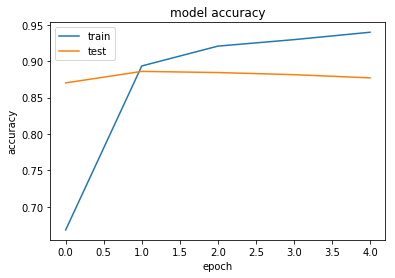

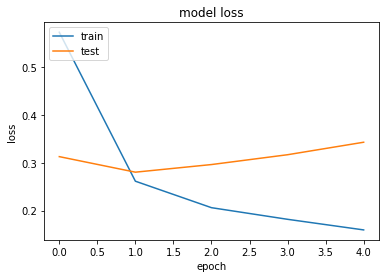

In [59]:
from matplotlib import pyplot as plt

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model = Sequential()

# Input - Layer
model.add(Embedding(vocab_size, 100, input_length=max_length))
# Hidden - Layers
model.add(layers.Dropout(0.5, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(30, activation = "relu"))
# Flatten dimensions
model.add(Flatten())
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 100)          1000000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 300, 100)          0         
_________________________________________________________________
dense_4 (Dense)              (None, 300, 50)           5050      
_________________________________________________________________
dropout_4 (Dropout)          (None, 300, 50)           0         
_________________________________________________________________
dense_5 (Dense)              (None, 300, 30)           1530      
_________________________________________________________________
flatten_2 (Flatten)          (None, 9000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9001      
Total para

In [0]:
# compiling the model
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [65]:
results = model.fit(
 X_train, y_train,
 epochs= 5,
 batch_size = 256,
 validation_data = (X_test, y_test)
)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 47s 1ms/step - loss: 0.1774 - acc: 0.9309 - val_loss: 0.3359 - val_acc: 0.8748
Epoch 2/5
40000/40000 [==============================] - 47s 1ms/step - loss: 0.1572 - acc: 0.9382 - val_loss: 0.3612 - val_acc: 0.8758
Epoch 3/5
40000/40000 [==============================] - 47s 1ms/step - loss: 0.1449 - acc: 0.9440 - val_loss: 0.3895 - val_acc: 0.8703
Epoch 4/5
40000/40000 [==============================] - 47s 1ms/step - loss: 0.1345 - acc: 0.9493 - val_loss: 0.4229 - val_acc: 0.8697
Epoch 5/5
40000/40000 [==============================] - 47s 1ms/step - loss: 0.1291 - acc: 0.9508 - val_loss: 0.4707 - val_acc: 0.8587


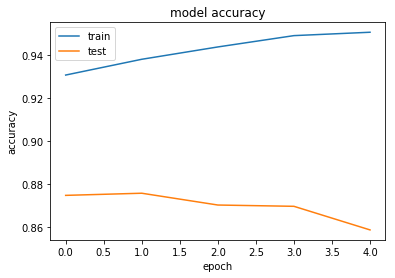

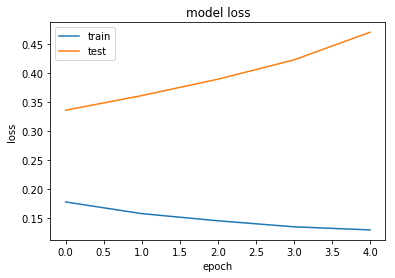

In [66]:
# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()